In [1]:
import pandas as pd
import numpy as np
from joblib import Parallel, delayed
from tqdm import tqdm
from math import floor, ceil
import os, pickle
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DATA_DIR = '..\\data\\raw'
INTERIM_DIR = '..\\data\\interim'
PROCESSED_DIR = '..\\data\\processed'

In [3]:
movies_df = pd.read_csv(os.path.join(INTERIM_DIR, 'movies.csv'))
movies_df

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,pi_mean_mean,pi_mean_std,pi_med_mean,pi_med_std,pi_std_mean,pi_std_std
0,0,tt0011216,movie,Spanish Fiesta,La fête espagnole,0,2019,67,Drama,6.3,23,7.098611,0.603472,7.058333,0.593647,0.441101,0.240865
1,1,tt0016906,movie,Frivolinas,Frivolinas,0,2014,80,"Comedy,Musical",5.6,15,5.910000,0.371484,5.900000,0.369121,0.388909,0.050000
2,2,tt0019996,movie,Hongxia,Hongxia,0,2011,94,"Drama,Action,Romance",6.3,52,6.850000,0.353553,6.900000,0.424264,0.264575,NaN
3,3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,122,Drama,6.8,6446,7.310000,0.747621,7.360000,0.752828,0.513928,0.171555
4,4,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,0,2017,80,"Comedy,Drama,Fantasy",6.6,266,6.882143,0.633889,7.100000,0.606905,1.025872,0.640175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90559,90559,tt9916160,movie,Drømmeland,Drømmeland,0,2019,72,Documentary,6.5,42,7.441667,0.851306,7.562500,1.043532,0.997006,0.265772
90560,90560,tt9916192,tvMovie,Danielle Darrieux: Il est poli d'être gai!,Danielle Darrieux: Il est poli d'être gai!,0,2019,53,Biography,7.6,10,6.770000,0.526011,6.690000,0.542448,0.421633,0.118655
90561,90561,tt9916428,movie,The Secret of China,Hong xing zhao yao Zhong guo,0,2019,92,"Adventure,History,War",3.8,12,5.733333,1.397617,5.700000,1.416569,0.562341,0.500878
90562,90562,tt9916460,tvMovie,Pink Taxi,Pink Taxi,0,2019,92,Comedy,9.3,15,5.240000,4.833529,5.100000,4.757625,0.493288,0.854400


In [4]:
movies_df.columns

Index(['Unnamed: 0', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'runtimeMinutes', 'genres', 'averageRating',
       'numVotes', 'pi_mean_mean', 'pi_mean_std', 'pi_med_mean', 'pi_med_std',
       'pi_std_mean', 'pi_std_std'],
      dtype='object')

In [5]:
movies_df['pi_mean_mean'].describe()

count    90220.000000
mean         6.398542
std          1.059342
min          0.000000
25%          5.990278
50%          6.575000
75%          7.017857
max          9.800000
Name: pi_mean_mean, dtype: float64

In [6]:
movies_df['pi_med_mean'].describe()

count    90220.000000
mean         6.429720
std          1.074649
min          0.000000
25%          6.014286
50%          6.610000
75%          7.062500
max          9.800000
Name: pi_med_mean, dtype: float64

In [7]:
movies_df['numVotes'].describe()

count    9.056400e+04
mean     3.195452e+03
std      2.946926e+04
min      5.000000e+00
25%      1.400000e+01
50%      5.000000e+01
75%      2.830000e+02
max      1.541404e+06
Name: numVotes, dtype: float64

In [20]:
movies_df.sort_values(by='pi_mean_mean', ascending=False).head(10)

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,pi_mean_mean,pi_mean_std,pi_med_mean,pi_med_std,pi_std_mean,pi_std_std
5100,5100,tt11488986,movie,"I Want to Go Mad, Raving Mad","Je Veux Devenir Fou, Fou Furieux",0,2016,380,Drama,9.8,8,9.800000,0.000000,9.800,0.000000,NaN,NaN
2551,2551,tt10595290,tvMovie,India's Paratroopers: Earning The Badge,India's Paratroopers: Earning The Badge,0,2016,92,Documentary,9.7,7,9.700000,NaN,9.700,NaN,NaN,NaN
66008,66008,tt5967130,tvMovie,Vlog Fest 2016,Vlog Fest 2016,0,2016,50,"Comedy,Drama",9.7,115,9.570000,0.290689,9.570,0.290689,0.919239,NaN
17808,17808,tt2102402,movie,Prasina Svakodnevnog Zivota,Prasina Svakodnevnog Zivota,0,2011,77,Documentary,9.8,10,9.566667,0.329983,9.450,0.494975,0.404145,NaN
52500,52500,tt4595654,movie,A Fanatic by Choice,A Fanatic by Choice,0,2015,90,Documentary,9.5,39,9.500000,0.000000,9.500,0.000000,NaN,NaN
47943,47943,tt4151864,movie,A Last Year in 114 Minutes,Un ultim an in 114 minute,0,2014,114,Documentary,9.5,8,9.500000,NaN,9.500,NaN,NaN,NaN
77855,77855,tt7452376,tvMovie,Muhtesem Ruanda,Muhtesem Ruanda,0,2018,92,Documentary,9.5,70,9.493750,0.104831,9.525,0.050000,0.236908,0.179059
61733,61733,tt5540164,tvMovie,Pogledi: Kako ste vi to zamislili,Pogledi: Kako ste vi to zamislili,0,2016,45,Documentary,9.6,32,9.460000,0.194936,9.560,0.151658,0.619641,0.228231
4866,4866,tt11367634,movie,Outside the City,Outside the City,0,2019,82,Documentary,9.4,51,9.400000,0.000000,9.400,0.000000,0.000000,NaN
71459,71459,tt6527322,movie,11 Days and a Wake Up,11 Days and a Wake Up,0,2017,105,Documentary,9.4,5,9.400000,NaN,9.400,NaN,NaN,NaN


###  Assessing the effectiveness of the Popluarity Index for Movies

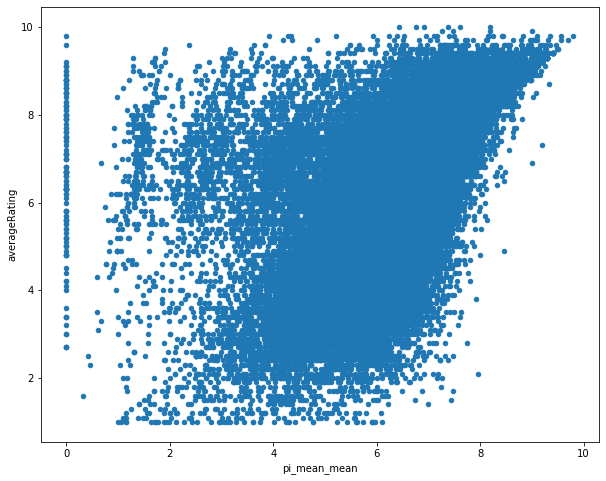

In [8]:
movies_df.plot.scatter('pi_mean_mean', 'averageRating', figsize=(10,8))

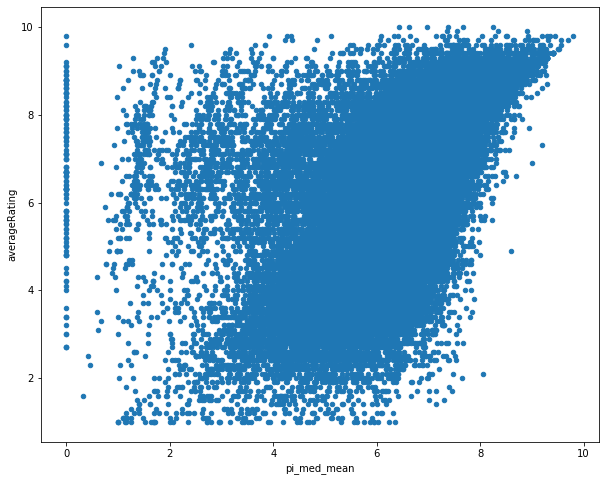

In [9]:
movies_df.plot.scatter('pi_med_mean', 'averageRating', figsize=(10,8))

In [10]:
pop_ind_columns = [col for col in movies_df.columns if 'pi_' in col]
pop_ind_columns

['pi_mean_mean',
 'pi_mean_std',
 'pi_med_mean',
 'pi_med_std',
 'pi_std_mean',
 'pi_std_std']

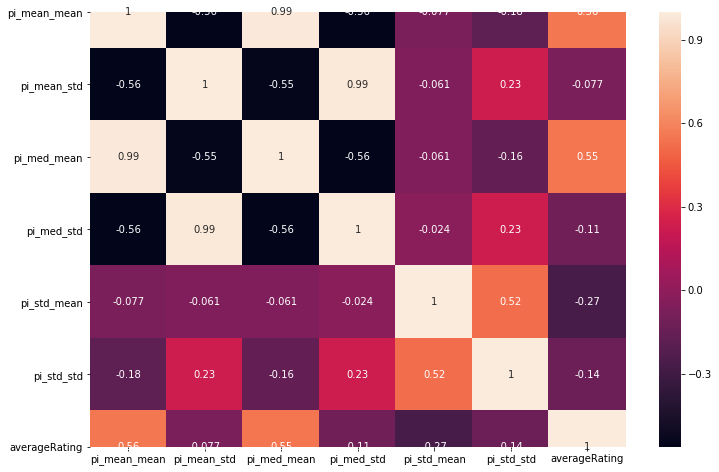

In [32]:
pop_ind_corr = movies_df[pop_ind_columns+['averageRating']]

plt.figure(figsize=(12,8))
sns.heatmap(pop_ind_corr.corr(), 
            xticklabels=pop_ind_corr.columns,
            yticklabels=pop_ind_corr.columns,
            annot=True)

### Distribution of Person Popularity Index

In [12]:
names_df = pd.read_csv(os.path.join(PROCESSED_DIR, 'names.basics.csv'))
names_df.columns

Index(['Unnamed: 0', 'nconst', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles', 'pop_ind_mean', 'pop_ind_median',
       'pop_ind_std'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016275165688>]],
      dtype=object)

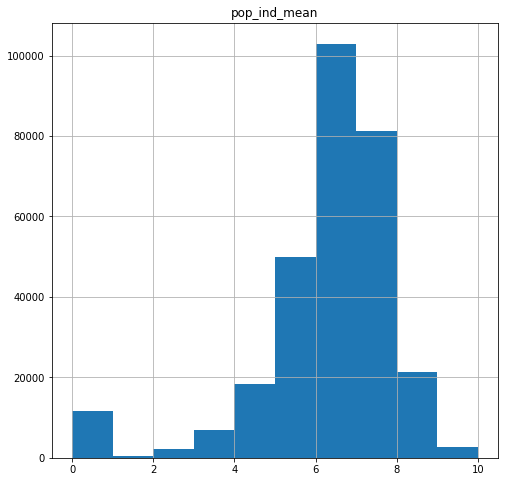

In [13]:
names_df.hist(column='pop_ind_mean', bins=10, figsize=(8,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001626D55E5C8>]],
      dtype=object)

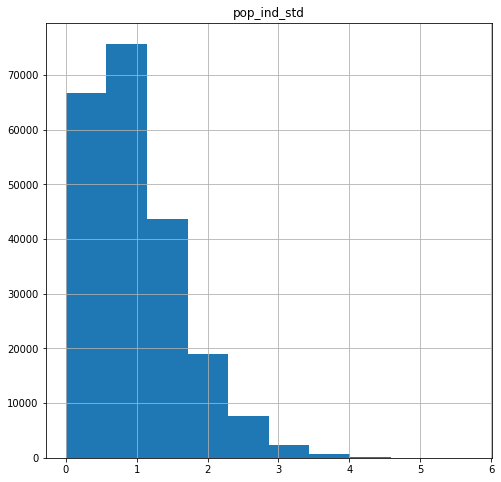

In [14]:
names_df.hist(column='pop_ind_std', bins=10, figsize=(8,8))

### Listing out highly popular people according to popularity index

In [15]:
names_df[names_df['pop_ind_mean']>8]

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles,pop_ind_mean,pop_ind_median,pop_ind_std
4,4,nm0000005,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0050986,tt0060827,tt0050976,tt0069467",8.150,8.15,0.057735
5,5,nm0000006,Ingrid Bergman,1915.0,1982.0,"actress,soundtrack,producer","tt0034583,tt0077711,tt0036855,tt0038109",8.025,8.00,0.403113
6,6,nm0000007,Humphrey Bogart,1899.0,1957.0,"actor,soundtrack,producer","tt0042593,tt0033870,tt0034583,tt0043265",8.050,8.00,0.331662
7,7,nm0000008,Marlon Brando,1924.0,2004.0,"actor,soundtrack,director","tt0047296,tt0070849,tt0078788,tt0068646",8.175,8.25,0.910586
17,17,nm0000033,Alfred Hitchcock,1899.0,1980.0,"director,producer,actor","tt0040746,tt0053125,tt0054215,tt0052357",8.275,8.30,0.206155
...,...,...,...,...,...,...,...,...,...,...
301261,301261,nm9991303,Yeray Martin Perdomo,NaN,NaN,"cinematographer,camera_department","tt9303412,tt8738288,tt10602830",8.150,8.15,0.494975
301268,301268,nm9991855,Vince Ricci,NaN,NaN,actor,"tt10369290,tt8347414",8.200,8.20,NaN
301270,301270,nm9992253,Pedro Mario Burelli,NaN,NaN,NaN,tt8580948,8.100,8.10,NaN
301271,301271,nm9992255,Oscar Arias,NaN,NaN,NaN,tt8580948,8.100,8.10,NaN


### Distribution of movie popularity index

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001626D9F2508>]],
      dtype=object)

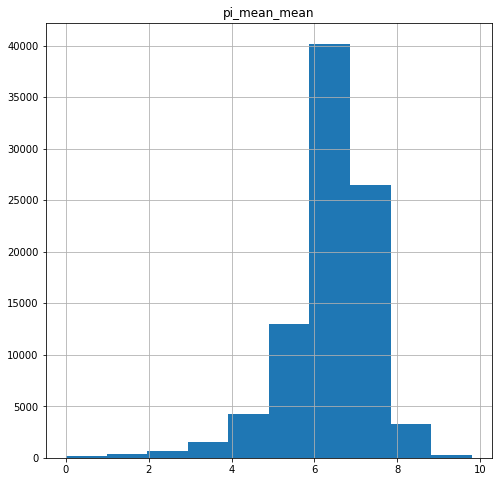

In [22]:
movies_df.hist(column='pi_mean_mean', bins=10, figsize=(8,8))

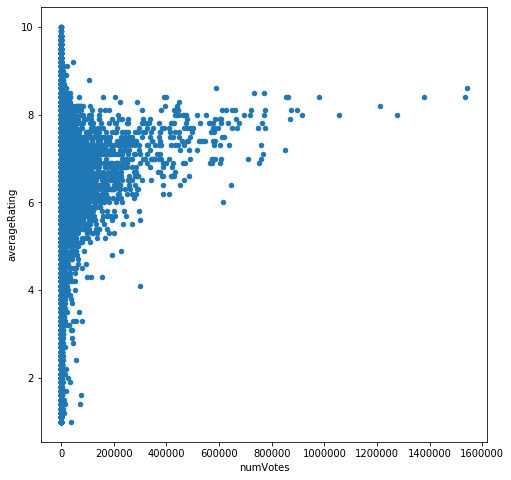

In [23]:
movies_df.plot.scatter('numVotes', 'averageRating', figsize=(8,8))

In [25]:
high_num_votes = movies_df[movies_df['numVotes']>200000]
high_num_votes

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,runtimeMinutes,genres,averageRating,numVotes,pi_mean_mean,pi_mean_std,pi_med_mean,pi_med_std,pi_std_mean,pi_std_std
48,48,tt0359950,movie,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,0,2013,114,"Adventure,Comedy,Drama",7.3,296074,6.555556,0.541543,6.633333,0.675031,0.995114,0.288730
53,53,tt0369610,movie,Jurassic World,Jurassic World,0,2015,124,"Action,Adventure,Sci-Fi",7.0,584380,7.085185,0.371483,7.138889,0.362955,0.666370,0.224136
63,63,tt0401729,movie,John Carter,John Carter,0,2012,132,"Action,Adventure,Sci-Fi",6.6,256592,7.029167,0.450617,7.050000,0.516167,0.668865,0.358426
69,69,tt0409847,movie,Cowboys & Aliens,Cowboys & Aliens,0,2011,119,"Action,Sci-Fi,Thriller",6.0,209085,7.225000,0.698944,7.345833,0.726279,0.816837,0.336424
79,79,tt0433035,movie,Real Steel,Real Steel,0,2011,127,"Action,Drama,Sci-Fi",7.1,300237,6.977778,0.538871,7.088889,0.418164,0.821348,0.510533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80239,80239,tt7784604,movie,Hereditary,Hereditary,0,2018,127,"Drama,Horror,Mystery",7.3,247970,7.301667,0.327257,7.320000,0.347491,0.560850,0.420239
83550,83550,tt8367814,movie,The Gentlemen,The Gentlemen,0,2019,113,"Action,Comedy,Crime",7.8,255731,7.203125,0.704886,7.250000,0.708620,0.991317,0.899669
84662,84662,tt8579674,movie,1917,1917,0,2019,119,"Drama,Thriller,War",8.3,449656,7.704167,0.314411,7.716667,0.301109,0.581859,0.426100
85612,85612,tt8772262,movie,Midsommar,Midsommar,0,2019,148,"Drama,Horror,Mystery",7.1,211361,7.028333,0.431752,6.970000,0.432435,0.515933,0.312209


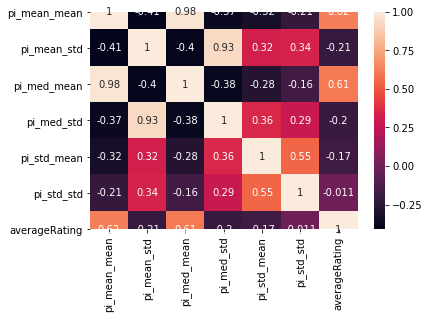

In [31]:
high_num_votes_corr = high_num_votes[pop_ind_columns+['averageRating']]

# plt.figure(figsize=(12,12))
sns.heatmap(high_num_votes_corr.corr(), 
            xticklabels=pop_ind_corr.columns,
            yticklabels=pop_ind_corr.columns,
            annot=True)